# FACTOR ANALYSIS 

In [10]:
!pip install Factor-Analyzer

In [11]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [12]:
df= pd.read_csv(r"C:\Users\nikhi\Downloads\Dataset_Divorce.csv")

In [13]:
df.columns

Index(['Sorry_end', 'Ignore_diff', 'begin_correct', 'Contact', 'Special_time',
       'No_home_time', '2_strangers', 'enjoy_holiday', 'enjoy_travel',
       'common_goals', 'harmony', 'freeom_value', 'entertain', 'people_goals',
       'dreams', 'love', 'happy', 'marriage', 'roles', 'trust', 'likes',
       'care_sick', 'fav_food', 'stresses', 'inner_world', 'anxieties',
       'current_stress', 'hopes_wishes', 'know_well', 'friends_social',
       'Aggro_argue', 'Always_never', 'negative_personality',
       'offensive_expressions', 'insult', 'humiliate', 'not_calm',
       'hate_subjects', 'sudden_discussion', 'idk_what's_going_on',
       'calm_breaks', 'argue_then_leave', 'silent_for_calm',
       'good_to_leave_home', 'silence_instead_of_discussion',
       'silence_for_harm', 'silence_fear_anger', 'I'm_right', 'accusations',
       'I'm_not_guilty', 'I'm_not_wrong', 'no_hesitancy_inadequate',
       'you're_inadequate', 'incompetence', 'Divorce_Y_N'],
      dtype='object')

In [14]:
# Inspect Data
print("Columns:", df.columns)

Columns: Index(['Sorry_end', 'Ignore_diff', 'begin_correct', 'Contact', 'Special_time',
       'No_home_time', '2_strangers', 'enjoy_holiday', 'enjoy_travel',
       'common_goals', 'harmony', 'freeom_value', 'entertain', 'people_goals',
       'dreams', 'love', 'happy', 'marriage', 'roles', 'trust', 'likes',
       'care_sick', 'fav_food', 'stresses', 'inner_world', 'anxieties',
       'current_stress', 'hopes_wishes', 'know_well', 'friends_social',
       'Aggro_argue', 'Always_never', 'negative_personality',
       'offensive_expressions', 'insult', 'humiliate', 'not_calm',
       'hate_subjects', 'sudden_discussion', 'idk_what's_going_on',
       'calm_breaks', 'argue_then_leave', 'silent_for_calm',
       'good_to_leave_home', 'silence_instead_of_discussion',
       'silence_for_harm', 'silence_fear_anger', 'I'm_right', 'accusations',
       'I'm_not_guilty', 'I'm_not_wrong', 'no_hesitancy_inadequate',
       'you're_inadequate', 'incompetence', 'Divorce_Y_N'],
      dtype='object

In [15]:
print(df.head())

   Sorry_end  Ignore_diff  begin_correct  Contact  Special_time  No_home_time  \
0          2            2              4        1             0             0   
1          4            4              4        4             4             0   
2          2            2              2        2             1             3   
3          3            2              3        2             3             3   
4          2            2              1        1             1             1   

   2_strangers  enjoy_holiday  enjoy_travel  common_goals  ...  \
0            0              0             0             0  ...   
1            0              4             4             4  ...   
2            2              1             1             2  ...   
3            3              3             3             3  ...   
4            0              0             0             0  ...   

   silence_for_harm  silence_fear_anger  I'm_right  accusations  \
0                 2                   1          

In [16]:

# Drop rows with missing values (necessary for correlation-based analysis)
df.dropna(inplace=True)

In [17]:
# Display data information and check for data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Sorry_end                      170 non-null    int64
 1   Ignore_diff                    170 non-null    int64
 2   begin_correct                  170 non-null    int64
 3   Contact                        170 non-null    int64
 4   Special_time                   170 non-null    int64
 5   No_home_time                   170 non-null    int64
 6   2_strangers                    170 non-null    int64
 7   enjoy_holiday                  170 non-null    int64
 8   enjoy_travel                   170 non-null    int64
 9   common_goals                   170 non-null    int64
 10  harmony                        170 non-null    int64
 11  freeom_value                   170 non-null    int64
 12  entertain                      170 non-null    int64
 13  people_goals        

<Axes: >

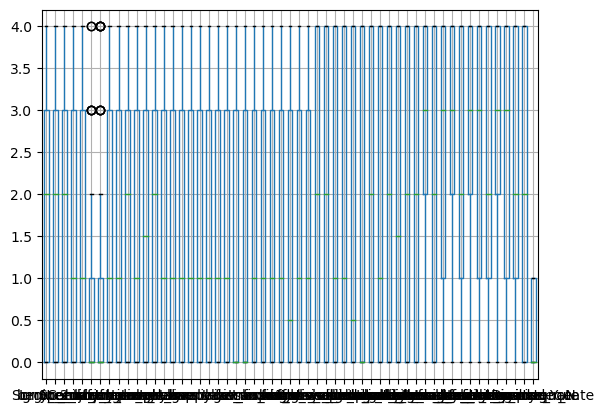

In [18]:
df.boxplot(column=["Sorry_end","Ignore_diff","begin_correct","Contact","Special_time","No_home_time","2_strangers","enjoy_holiday","enjoy_travel","common_goals","harmony","freeom_value","entertain","people_goals","dreams","love","happy","marriage","roles","trust","likes","care_sick","fav_food","stresses","inner_world","anxieties","current_stress","hopes_wishes","know_well","friends_social","Aggro_argue","Always_never","negative_personality","offensive_expressions","insult","humiliate","not_calm","hate_subjects","sudden_discussion","idk_what's_going_on","calm_breaks","argue_then_leave","silent_for_calm","good_to_leave_home","silence_instead_of_discussion","silence_for_harm","silence_fear_anger","I'm_right","accusations","I'm_not_guilty","I'm_not_wrong","no_hesitancy_inadequate","you're_inadequate","incompetence","Divorce_Y_N"])


In [19]:
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


# Bartlett Test
Ho: Correlation matrix is an identity matrix
v/s
H1:Correlation matrix is not an identity matrix

In [20]:
Correlation = df.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x >= 0.7 else '')

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,harmony,freeom_value,entertain,people_goals,dreams,love,happy,marriage,roles,trust,likes,care_sick,fav_food,stresses,inner_world,anxieties,current_stress,hopes_wishes,know_well,friends_social,Aggro_argue,Always_never,negative_personality,offensive_expressions,insult,humiliate,not_calm,hate_subjects,sudden_discussion,idk_what's_going_on,calm_breaks,argue_then_leave,silent_for_calm,good_to_leave_home,silence_instead_of_discussion,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
Sorry_end,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,0.892253,0.794307,0.842996,0.817099,0.848754,0.831822,0.895970,0.853739,0.900446,0.840966,0.815708,0.785280,0.822534,0.813233,0.822084,0.803507,0.829037,0.762102,0.858139,0.792257,0.699223,0.739679,0.799735,0.749774,0.796413,0.812867,0.786890,0.804129,0.817035,0.838355,0.804182,0.642307,0.482223,0.752972,0.510160,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Ignore_diff,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,0.823380,0.862835,0.791073,0.875800,0.801316,0.806497,0.822317,0.883856,0.829422,0.884176,0.790468,0.795406,0.773018,0.868240,0.769244,0.861421,0.817364,0.776943,0.789827,0.844007,0.661210,0.735763,0.757286,0.714360,0.753566,0.781295,0.747088,0.751705,0.787768,0.788200,0.780757,0.648539,0.503894,0.699765,0.489062,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
begin_correct,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,0.805915,0.780258,0.758969,0.750602,0.806909,0.775528,0.808161,0.797395,0.798999,0.807892,0.796069,0.727933,0.706585,0.740476,0.724506,0.728653,0.797595,0.689914,0.755491,0.752391,0.652188,0.747669,0.726481,0.702500,0.730290,0.744390,0.736984,0.740642,0.759820,0.781657,0.739967,0.569293,0.385152,0.661830,0.427409,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Contact,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,0.808533,0.793992,0.751623,0.757000,0.794184,0.878416,0.809968,0.835296,0.832750,0.815896,0.775132,0.839534,0.744783,0.776640,0.736228,0.762765,0.767206,0.827847,0.781792,0.772562,0.661251,0.746677,0.764381,0.729022,0.770813,0.794636,0.760451,0.790350,0.763502,0.798520,0.768706,0.639671,0.452479,0.707212,0.446798,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Special_time,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,0.936955,0.846513,0.915033,0.845576,0.879461,0.853561,0.947429,0.894474,0.943349,0.892909,0.871994,0.840265,0.888584,0.833608,0.888740,0.836194,0.883768,0.809789,0.925601,0.837501,0.785038,0.832032,0.879037,0.827560,0.878289,0.887498,0.859581,0.852601,0.866293,0.871809,0.864434,0.737922,0.613142,0.799453,0.591656,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
No_home_time,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,0.340135,0.209801,0.305109,0.224459,0.323787,0.311056,0.377330,0.251856,0.365227,0.230486,0.273564,0.220010,0.246478,0.191458,0.291159,0.200634,0.283895,0.254858,0.309302,0.266464,0.247634,0.316605,0.292037,0.279789,0.276539,0.287708,0.281458,0.297791,0.296121,0.351433,0.329765,0.227993,0.171599,0.339918,0.094820,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
2_strangers,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,0.432479,0.511761,0.373361,0.491021,0.494110,0.573290,0.461450,0.544550,0.469995,0.544207,0.409827,0.378915,0.254912,0.446469,0.288867,0.443149,0.444

In [21]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value  ## alpha = 0.05

(18090.631389919745, 0.0)

# Kaiser-Meyer-Olkin (KMO) Test
measures the suitability of data for factor analysis.
It determines the adequacy for each observed variable and for the complete model.
KMO estimates the proportion of variance among all the observed variable.
KMO values range between 0 and 1. Value of KMO less than 0.5 is considered inadequate.

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

C:\Users\nikhi\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9647040456339003

# Choosing the Number of Factors
For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [23]:
#Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation='varimax',method="principal")
fa.fit(df)
# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([4.10748094e+01, 2.18031315e+00, 1.41945653e+00, 1.20996657e+00,
       8.96640091e-01, 7.88909851e-01, 6.98684538e-01, 5.95377812e-01,
       5.68941875e-01, 5.29393980e-01, 4.33459322e-01, 3.90416652e-01,
       3.67447584e-01, 3.19306544e-01, 2.84661547e-01, 2.70412906e-01,
       2.52914226e-01, 2.20403370e-01, 2.02214127e-01, 1.91486433e-01,
       1.78736203e-01, 1.66147554e-01, 1.38947400e-01, 1.35612951e-01,
       1.19183453e-01, 1.10678548e-01, 1.07110419e-01, 1.01939718e-01,
       9.52996291e-02, 9.14721334e-02, 7.94908436e-02, 7.39925955e-02,
       6.61561826e-02, 6.22934329e-02, 5.74253792e-02, 5.40274527e-02,
       5.07588151e-02, 4.75637191e-02, 4.00468571e-02, 3.84752443e-02,
       3.57448141e-02, 3.44331667e-02, 2.81546602e-02, 2.60098136e-02,
       2.47705083e-02, 2.16706251e-02, 1.87891923e-02, 1.76072259e-02,
       1.57181562e-02, 1.38738526e-02, 1.27661324e-02, 1.19374255e-02,
       1.08145955e-02, 9.72224446e-03, 7.41254483e-03])

In [24]:
dd=pd.DataFrame(eigen_values,columns=["Eigen_Values"])
dd['Factor'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]

dd.head()

,Eigen_Values,Factor
0,41.074809,1
1,2.180313,2
2,1.419457,3
3,1.209967,4
4,0.896640,5


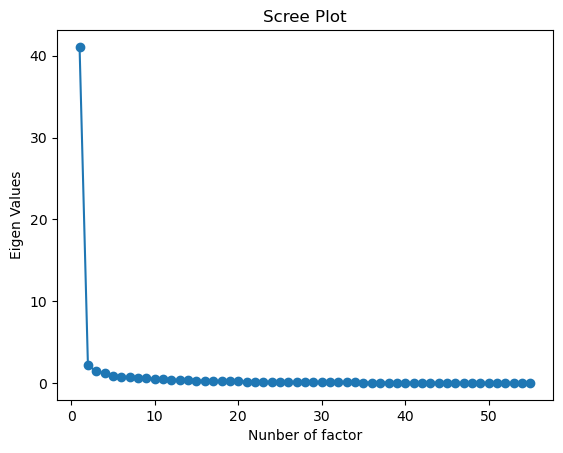

In [25]:
import matplotlib.pyplot as plt

plt.plot( 'Factor', 'Eigen_Values', data=dd, linestyle='-', marker='o')
plt.xlabel("Nunber of factor")
plt.ylabel("Eigen Values")
plt.title("Scree Plot")
plt.show()


# Performing Factor Analysis

In [26]:
# Create factor analysis object and perform factor analysis
aa=FactorAnalyzer(n_factors=3,rotation='varimax',method="principal")

In [27]:
model=aa.fit(df)

# Correlation Matrix

In [28]:
data_loading=df.columns.to_list()
data_loading

['Sorry_end',
 'Ignore_diff',
 'begin_correct',
 'Contact',
 'Special_time',
 'No_home_time',
 '2_strangers',
 'enjoy_holiday',
 'enjoy_travel',
 'common_goals',
 'harmony',
 'freeom_value',
 'entertain',
 'people_goals',
 'dreams',
 'love',
 'happy',
 'marriage',
 'roles',
 'trust',
 'likes',
 'care_sick',
 'fav_food',
 'stresses',
 'inner_world',
 'anxieties',
 'current_stress',
 'hopes_wishes',
 'know_well',
 'friends_social',
 'Aggro_argue',
 'Always_never',
 'negative_personality',
 'offensive_expressions',
 'insult',
 'humiliate',
 'not_calm',
 'hate_subjects',
 'sudden_discussion',
 "idk_what's_going_on",
 'calm_breaks',
 'argue_then_leave',
 'silent_for_calm',
 'good_to_leave_home',
 'silence_instead_of_discussion',
 'silence_for_harm',
 'silence_fear_anger',
 "I'm_right",
 'accusations',
 "I'm_not_guilty",
 "I'm_not_wrong",
 'no_hesitancy_inadequate',
 "you're_inadequate",
 'incompetence',
 'Divorce_Y_N']

In [29]:
Correlation=pd.DataFrame(model.corr_,index=data_loading,columns=data_loading)
#round(Correlation,3)
Correlation.style.applymap(lambda x: 'background-color : yellow' if x >= 0.7 else '')

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,harmony,freeom_value,entertain,people_goals,dreams,love,happy,marriage,roles,trust,likes,care_sick,fav_food,stresses,inner_world,anxieties,current_stress,hopes_wishes,know_well,friends_social,Aggro_argue,Always_never,negative_personality,offensive_expressions,insult,humiliate,not_calm,hate_subjects,sudden_discussion,idk_what's_going_on,calm_breaks,argue_then_leave,silent_for_calm,good_to_leave_home,silence_instead_of_discussion,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
Sorry_end,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,0.892253,0.794307,0.842996,0.817099,0.848754,0.831822,0.895970,0.853739,0.900446,0.840966,0.815708,0.785280,0.822534,0.813233,0.822084,0.803507,0.829037,0.762102,0.858139,0.792257,0.699223,0.739679,0.799735,0.749774,0.796413,0.812867,0.786890,0.804129,0.817035,0.838355,0.804182,0.642307,0.482223,0.752972,0.510160,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Ignore_diff,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,0.823380,0.862835,0.791073,0.875800,0.801316,0.806497,0.822317,0.883856,0.829422,0.884176,0.790468,0.795406,0.773018,0.868240,0.769244,0.861421,0.817364,0.776943,0.789827,0.844007,0.661210,0.735763,0.757286,0.714360,0.753566,0.781295,0.747088,0.751705,0.787768,0.788200,0.780757,0.648539,0.503894,0.699765,0.489062,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
begin_correct,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,0.805915,0.780258,0.758969,0.750602,0.806909,0.775528,0.808161,0.797395,0.798999,0.807892,0.796069,0.727933,0.706585,0.740476,0.724506,0.728653,0.797595,0.689914,0.755491,0.752391,0.652188,0.747669,0.726481,0.702500,0.730290,0.744390,0.736984,0.740642,0.759820,0.781657,0.739967,0.569293,0.385152,0.661830,0.427409,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Contact,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,0.808533,0.793992,0.751623,0.757000,0.794184,0.878416,0.809968,0.835296,0.832750,0.815896,0.775132,0.839534,0.744783,0.776640,0.736228,0.762765,0.767206,0.827847,0.781792,0.772562,0.661251,0.746677,0.764381,0.729022,0.770813,0.794636,0.760451,0.790350,0.763502,0.798520,0.768706,0.639671,0.452479,0.707212,0.446798,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Special_time,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,0.936955,0.846513,0.915033,0.845576,0.879461,0.853561,0.947429,0.894474,0.943349,0.892909,0.871994,0.840265,0.888584,0.833608,0.888740,0.836194,0.883768,0.809789,0.925601,0.837501,0.785038,0.832032,0.879037,0.827560,0.878289,0.887498,0.859581,0.852601,0.866293,0.871809,0.864434,0.737922,0.613142,0.799453,0.591656,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
No_home_time,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,0.340135,0.209801,0.305109,0.224459,0.323787,0.311056,0.377330,0.251856,0.365227,0.230486,0.273564,0.220010,0.246478,0.191458,0.291159,0.200634,0.283895,0.254858,0.309302,0.266464,0.247634,0.316605,0.292037,0.279789,0.276539,0.287708,0.281458,0.297791,0.296121,0.351433,0.329765,0.227993,0.171599,0.339918,0.094820,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
2_strangers,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,0.432479,0.511761,0.373361,0.491021,0.494110,0.573290,0.461450,0.544550,0.469995,0.544207,0.409827,0.378915,0.254912,0.446469,0.288867,0.443149,0.444

# Factor Loading Matrix

In [30]:
factor=["Factor1 (Z1) ","Factor2 (Z2)","Factor3 (Z3)"]  # array

In [31]:
loading=pd.DataFrame(model.loadings_,columns=factor,index=data_loading)
loading=loading.abs()
loading.style.applymap(lambda x: 'background-color : yellow' if x > 0.5 else '')

,Factor1 (Z1),Factor2 (Z2),Factor3 (Z3)
Sorry_end,0.739011,0.299465,0.420833
Ignore_diff,0.800250,0.341860,0.252625
begin_correct,0.736227,0.178481,0.409755
Contact,0.762961,0.242220,0.370741
Special_time,0.690956,0.441755,0.479511
No_home_time,0.155966,0.130560,0.509453
2_strangers,0.573170,0.207116,0.293688
enjoy_holiday,0.778670,0.402828,0.330268
enjoy_travel,0.768992,0.371502,0.421192
common_goals,0.812152,0.222070,0.350018


# Eigen values

In [32]:
header=["Eigen_Value","Perentage of Variance Explained","Cumulative Perentage of Variance Explained"]

In [33]:
variance_Explained=pd.DataFrame(model.get_factor_variance(),columns=factor,index=header)
variance_Explained

,Factor1 (Z1),Factor2 (Z2),Factor3 (Z3)
Eigen_Value,22.621395,10.504455,11.548729
Perentage of Variance Explained,0.411298,0.190990,0.209977
Cumulative Perentage of Variance Explained,0.411298,0.602288,0.812265


# Communalities & Uniqueness

In [34]:
communalities=pd.DataFrame(model.get_communalities(),columns=["communalities"],index=data_loading)
communalities ['uniqueness']= model.get_uniquenesses()
round(communalities,2)

,communalities,uniqueness
Sorry_end,0.81,0.19
Ignore_diff,0.82,0.18
begin_correct,0.74,0.26
Contact,0.78,0.22
Special_time,0.90,0.10
No_home_time,0.30,0.70
2_strangers,0.46,0.54
enjoy_holiday,0.88,0.12
enjoy_travel,0.91,0.09
common_goals,0.83,0.17


# Final Transform data

In [35]:
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [36]:
output=pd.DataFrame(model.fit_transform(df),columns=['Data Factor1','Data Factor2','Data Factor3'])
output

,Data Factor1,Data Factor2,Data Factor3
0,-0.773477,-0.629463,0.724309
1,1.353129,-0.678998,-0.064447
2,1.215639,-1.316794,-0.037469
3,1.441007,-1.669429,0.512914
4,-0.021434,-0.186705,-0.893788
...,...,...,...
165,-1.744324,-1.544677,2.308792
166,-1.649995,0.734704,0.007289
167,-0.483213,0.085306,-1.023741
168,-1.559814,0.576231,0.057388


In [37]:
print("original shape:   ", df.shape)
print("transformed shape:", output.shape)

original shape:    (170, 55)
transformed shape: (170, 3)


# To check the Factor Component is uncorrelated / independent

In [38]:
round(output.corr(),5)

,Data Factor1,Data Factor2,Data Factor3
Data Factor1,1.0,0.0,0.0
Data Factor2,0.0,1.0,-0.0
Data Factor3,0.0,-0.0,1.0


# FINISHED